In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
location = r'E:\python4\1226monthtest\train_new.csv'

In [3]:
df = pd.read_csv(location)

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


# 数据集有多少条？

In [5]:
len(df)

891

In [6]:
df.shape[0]

891

# 票价最贵的那条数据

In [7]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [8]:
fare = df['Fare'].str.replace('$','')
fare = fare.apply(lambda x:float(x))
df.loc[fare[fare.max() == fare].index]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,$512.3292,NaN,C
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,$512.3292,B51 B53 B55,C
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,$512.3292,B101,C


# 初步感受数据

In [9]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [10]:
df.info()    
#数据集共有891条数据，有13列信息，其中Age列数据缺失近200条、Cabin列数据缺失近700条

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null object
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


In [11]:
df.columns    
#可以看出数据集都包含哪些信息
#乘客ID，是否幸存，船舱等级、姓名、性别、年龄、是否有兄弟姐妹、票据、票价、船舱、上船地点

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=891, step=1)

# 概述此数据集

In [13]:
#此数据集共有891条数据，其中age列的数据缺失近200条、Cabin列的数据缺失近700条，
#包含891个乘客的各种信息，可以通过数据集来简要分析当时事故发生时关于幸存的简要信息，
#可以从多种角度来分析数据，可以看出幸存人的幸存因素包括哪些等

# 有没有不可以分析的列？

In [14]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [15]:
del df['Unnamed: 0']    #这一列没有分析的必要

In [16]:
del df['Cabin']        #这一列数据缺失太多，不具备代表性

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S


# 有没有叫jack的人？

In [18]:
df[df['Name'].str.contains('jack')]
#没有交Jack的人

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# 人口存活率和登录港口是否有关系？

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S


In [85]:
# df.groupby('Embarked')['Survived'].size()
s = df.groupby(['Embarked','Survived'])['Survived'].count()
s2 = df.groupby('Embarked')['Survived'].count()
s3 = s.div(s2,level = 'Embarked')*100
s.div(s2,level = 'Embarked')*100

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [92]:
s

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

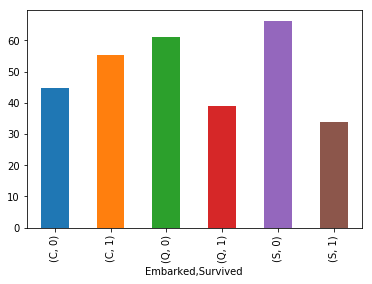

In [89]:
s3.plot(kind = 'bar')
plt.show()

In [21]:
#通过以上数据可以看出：在S港口上船、死亡率约为66.31%，明显高于C港口和Q港口
#在C港口上船、幸存率明显高于Q港口和S港口

In [84]:
df.pivot_table(values='Survived',index='Pclass',aggfunc=np.mean)
# df[df['Pclass'] == 1].Survived.sum() / df[df['Pclass'] == 1].Survived.size

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# 人员存活率和年龄是否有关系？

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S


In [23]:
# s = df.groupby(['Age','Survived'])['Survived'].count()
# s2 = df.groupby('Age')['Survived'].count()
# s.div(s2,level = 'Age')*100

In [24]:
s = pd.qcut(df['Age'],5)
df['AgeGroup'] = s
s.value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [25]:
df.pivot_table(values = 'Survived',index= 'AgeGroup',aggfunc = np.mean)

,Survived
AgeGroup,
"(0.419, 19.0]",0.481707
"(19.0, 25.0]",0.328467
"(25.0, 31.8]",0.393701
"(31.8, 41.0]",0.437500
"(41.0, 80.0]",0.373239


In [26]:
#以上数据可以看出，19岁以下的生还率最高

<BarContainer object of 65 artists>

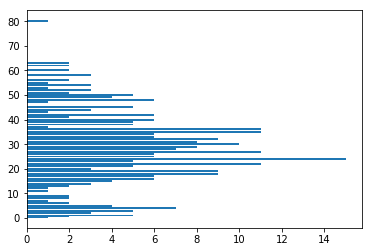

In [27]:
s = df[df['Survived'] == 1]['Age'].dropna()
s2 = s.value_counts()
plt.barh(s2.index,s2.values)

In [28]:
df_age = df[(df.Age<=16) | (df.Age >= 60)]
s = df_age['Survived'].sum()
s_total = df_age['Survived'].size
s2 = df['Survived'].sum()
s2_total = df['Survived'].size
s/s2

0.18128654970760233

In [29]:
#以上数据可以看出老人、儿童的生还率占比总生还率约为18%

In [30]:
s_total/s2_total

0.1414141414141414

In [31]:
#结合以上数据可以看出老人、儿童占比总人数为14%，在生还率中占比为18%，所以老人儿童生还率较高

# 人员存活率和性别是否有关系？

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]"


In [33]:
s = df.groupby('Sex')['Survived'].count()
s2 = df.groupby(['Sex','Survived'])['Survived'].count()
s3 = s2.div(s,level = 'Sex')
s2.div(s,level = 'Sex')

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [34]:
#以上数据可以看出：女性的生存率远远高于男性

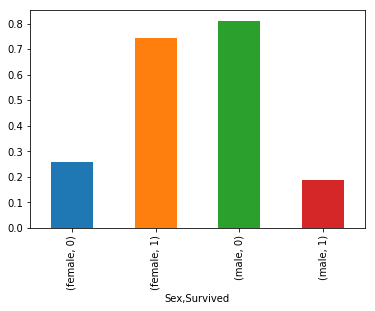

In [35]:
s3.plot(kind = 'bar')

# 人员存活和旅客类型是否有关系？

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]"


Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


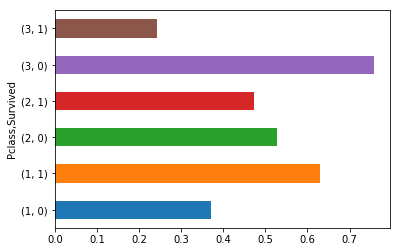

In [37]:
s = df.groupby(['Pclass','Survived'])['Survived'].count()
s2 = df.groupby('Pclass')['Survived'].count()
s3 = s.div(s2,level = 'Pclass')
print(s3)
s3.plot(kind = 'barh')

In [38]:
#以上数据和图例可以看出：3等舱的人死亡率最高、1等舱的人死亡率最低
#1等舱的人存活率最高、3等舱的人存活率最低

# 船上的人性别比例如何？

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]"


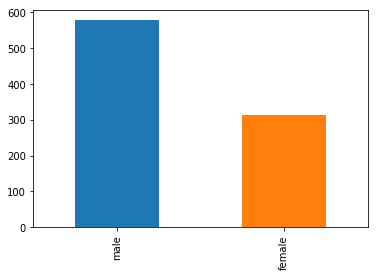

In [40]:
s = df['Sex'].value_counts()
s.plot(kind = 'bar')
#男性多于女性近一半

# 票价的散点图，颜色用性别区分、大小和票价面值成正比

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]"


In [68]:
s = df['Fare'].str.replace('$','')
s = s.apply(lambda x:float(x))
df['price'] = s
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]",7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]",71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]",7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]",53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]",8.0500


In [95]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,S,"(19.0, 25.0]",7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C,"(31.8, 41.0]",71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,S,"(25.0, 31.8]",7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,S,"(31.8, 41.0]",53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,S,"(31.8, 41.0]",8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,$8.4583,Q,NaN,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,$51.8625,S,"(41.0, 80.0]",51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,$21.075,S,"(0.419, 19.0]",21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,$11.1333,S,"(25.0, 31.8]",11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,$30.0708,C,"(0.419, 19.0]",30.0708


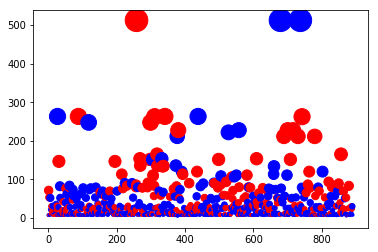

In [94]:
c = df.Sex.apply(lambda x:'blue' if x =='male' else 'red')
plt.scatter(df.index,df.price,s = df.price,c = c)
plt.show()

In [66]:
df[df_s.Sex == np.nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,price


# 妇女儿童生还率高是以为他们在头等舱？

In [ ]:
df.head()

In [ ]:
df.pivot_table(values = 'Survived',index = 'AgeGroup',columns = ['Sex','Pclass'],aggfunc = np.mean)